In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LogisticRegression
from collections import defaultdict
from IPython.core import display as ICD
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import arviz as az

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


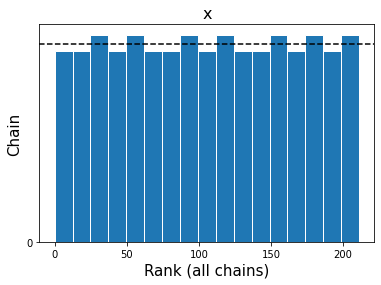

In [ ]:
az.plot_rank(ranking_2022["Team"].values)

In [ ]:
ls /content/drive/MyDrive

 2018_WC_Quali.csv  'Colab Notebooks'/             HistoricalResults.csv
 2022_WC_Quali.csv   fifa_ranking-2022-10-06.csv  'World Cup 2018 Dataset.csv'


In [ ]:
## World cup 2018 matches
totalRes = pd.read_csv('drive/MyDrive/HistoricalResults.csv')

In [ ]:

from datetime import datetime
wcData = totalRes[totalRes.tournament=="FIFA World Cup"]
wcData['date'] = pd.to_datetime(wcData['date'], format="%Y-%m-%d")
wcData = wcData[wcData.date>datetime(2018,6,13,0,0,0)]
wcData = wcData[wcData.date<datetime(2018,7,16,0,0,0)]
wcData = wcData.drop(['tournament','city','country','neutral'],axis=1)
wcData


<ipython-input-196-f79f5b214013>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcData['date'] = pd.to_datetime(wcData['date'], format="%Y-%m-%d")


,date,home_team,away_team,home_score,away_score
40356,2018-06-14,Russia,Saudi Arabia,5,0
40357,2018-06-15,Egypt,Uruguay,0,1
40358,2018-06-15,Morocco,Iran,0,1
40359,2018-06-15,Portugal,Spain,3,3
40360,2018-06-16,France,Australia,2,1
...,...,...,...,...,...
40416,2018-07-07,Russia,Croatia,2,2
40417,2018-07-10,France,Belgium,1,0
40418,2018-07-11,Croatia,England,2,1
40419,2018-07-14,Belgium,England,2,0


In [ ]:
# WC 2018 group stage matches
wc_2018_group_stage=wcData[0:48]

In [ ]:
#
conditions = [
    wc_2018_group_stage['home_score'] > wc_2018_group_stage['away_score'],
  wc_2018_group_stage['home_score'] < wc_2018_group_stage['away_score'],
  wc_2018_group_stage['home_score'] == wc_2018_group_stage['away_score']
  ]

choices = ["Win","Loss","Draw"]

wc_2018_group_stage['Result'] = np.select(conditions, choices, default=np.nan)

<ipython-input-198-e51bdb11f100>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['Result'] = np.select(conditions, choices, default=np.nan)


In [ ]:
wc_2018_group_stage.head(10)

,date,home_team,away_team,home_score,away_score,Result
40356,2018-06-14,Russia,Saudi Arabia,5,0,Win
40357,2018-06-15,Egypt,Uruguay,0,1,Loss
40358,2018-06-15,Morocco,Iran,0,1,Loss
40359,2018-06-15,Portugal,Spain,3,3,Draw
40360,2018-06-16,France,Australia,2,1,Win
40361,2018-06-16,Argentina,Iceland,1,1,Draw
40362,2018-06-16,Peru,Denmark,0,1,Loss
40363,2018-06-16,Croatia,Nigeria,2,0,Win
40364,2018-06-17,Costa Rica,Serbia,0,1,Loss
40365,2018-06-17,Germany,Mexico,0,1,Loss


In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.soccerphile.com/soccerphile/news/fifa-rankings/fifa_jun.html'
req = requests.get(url)

soup = BeautifulSoup(req.text,'lxml')
table = soup.find('table')
ranking_2018 = pd.read_html(str(table))[0]
ranking_2018

,Ranking,Team
0,1,Germany
1,2,Brazil
2,3,Belgium
3,4,Portugal
4,5,Argentina
...,...,...
206,206,Anguilla
207,206,Bahamas
208,206,Eritrea
209,206,Somalia


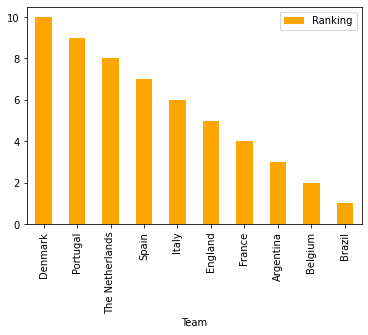

In [ ]:
ranking_2022[::-1][-10:].plot(x="Team", y="Ranking",kind="bar",color="Orange")

In [ ]:
ranking2018_dict=dict(zip(ranking_2018.Team, ranking_2018.Ranking))

In [ ]:
print(ranking_2018)

     Ranking       Team
0          1    Germany
1          2     Brazil
2          3    Belgium
3          4   Portugal
4          5  Argentina
..       ...        ...
206      206   Anguilla
207      206    Bahamas
208      206    Eritrea
209      206    Somalia
210      206      Tonga

[211 rows x 2 columns]


In [ ]:
condition = [(wc_2018_group_stage.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_group_stage['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_group_stage.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_group_stage['away_team_rankings'] = np.select(condition, values)



<ipython-input-204-83ef1b523faa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['home_team_rankings'] = np.select(condition, values)
<ipython-input-204-83ef1b523faa>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['away_team_rankings'] = np.select(condition, values)


In [ ]:
wc_2018_group_stage

,date,home_team,away_team,home_score,away_score,Result,home_team_rankings,away_team_rankings
40356,2018-06-14,Russia,Saudi Arabia,5,0,Win,70,67
40357,2018-06-15,Egypt,Uruguay,0,1,Loss,45,14
40358,2018-06-15,Morocco,Iran,0,1,Loss,41,37
40359,2018-06-15,Portugal,Spain,3,3,Draw,4,10
40360,2018-06-16,France,Australia,2,1,Win,7,36
40361,2018-06-16,Argentina,Iceland,1,1,Draw,5,22
40362,2018-06-16,Peru,Denmark,0,1,Loss,11,12
40363,2018-06-16,Croatia,Nigeria,2,0,Win,20,48
40364,2018-06-17,Costa Rica,Serbia,0,1,Loss,23,34
40365,2018-06-17,Germany,Mexico,0,1,Loss,1,15


In [ ]:
condition = [(wc_2018_group_stage.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_group_stage['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_group_stage.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_group_stage['away_team_rankings'] = np.select(condition, values)

<ipython-input-206-85bea61ded2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['home_team_rankings'] = np.select(condition, values)
<ipython-input-206-85bea61ded2d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['away_team_rankings'] = np.select(condition, values)


In [ ]:
wc_2018_group_stage.loc[wc_2018_group_stage['home_team'] =="South Korea", 'home_team_rankings'] = 57
wc_2018_group_stage.loc[wc_2018_group_stage['away_team'] =="South Korea", 'away_team_rankings'] = 57

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [ ]:
wcQualiData = pd.read_csv('drive/MyDrive/2018_WC_Quali.csv')

In [ ]:
wcQualiData.sort_values(by=['PPG'], ascending = False)

,Team,Played,Points,PPG
8,Germany,10.000000,30.000000,3.000000
10,Spain,10.000000,28.000000,2.800000
5,Belgium,10.000000,28.000000,2.800000
26,Switzerland,10.000000,27.000000,2.700000
17,Portugal,10.000000,27.000000,2.700000
9,England,10.000000,26.000000,2.600000
13,Poland,10.000000,25.000000,2.500000
25,Tunisia,6.000000,14.000000,2.333333
23,Senegal,6.000000,14.000000,2.333333
18,France,10.000000,23.000000,2.300000


In [ ]:
ppg_qualifying_dict=dict(zip(wcQualiData.Team, wcQualiData.PPG))

In [ ]:
condition = [(wc_2018_group_stage.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_group_stage['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2018_group_stage.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_group_stage['away_team_qualifying_ppg'] = np.select(condition, values)



<ipython-input-211-1bf37924cb9f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['home_team_qualifying_ppg'] = np.select(condition, values)
<ipython-input-211-1bf37924cb9f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['away_team_qualifying_ppg'] = np.select(condition, values)


In [ ]:
totalRes.drop(['date','tournament','city','country','neutral'], axis=1, inplace=True)
totalRes.dropna(inplace=True)
totalRes_filter = pd.DataFrame(totalRes[['away_team','home_team','away_score','home_score']])
totalRes = totalRes.append(totalRes_filter)

In [ ]:
home = totalRes['home_score'].values
away = totalRes['away_score'].values
result = []
for i in range(totalRes.shape[0]):
    if home[i] == away[i]:
        result.append('Draw')
    elif home[i] > away[i]:
        result.append('Win')
    else:
        result.append('Loss')
totalRes['result'] = result


In [ ]:
win_pct_dict_home={}
win_pct_dict_away={}

for i in wc_2018_group_stage["home_team"].values:

  totalRes_team = totalRes[totalRes.home_team == i]
  win = totalRes_team['result'].value_counts()['Win']
  win_pct = win/totalRes_team.shape[0]
  win_pct_dict_home[i]=win_pct*100
for i in wc_2018_group_stage["away_team"].values:

  totalRes_team = totalRes[totalRes.home_team == i]
  win = totalRes_team['result'].value_counts()['Win']
  win_pct = win/totalRes_team.shape[0]
  win_pct_dict_away[i]=win_pct*100

In [ ]:
condition = [(wc_2018_group_stage.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2018_group_stage['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2018_group_stage.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2018_group_stage['away_team_historical_win_pct'] = np.select(condition, values)

<ipython-input-215-4d671bc15492>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['home_team_historical_win_pct'] = np.select(condition, values)
<ipython-input-215-4d671bc15492>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wc_2018_group_stage['away_team_historical_win_pct'] = np.select(condition, values)


In [ ]:
win_pct_dict_home

{'Russia': 61.09324758842444,
 'Egypt': 64.44444444444444,
 'Morocco': 61.858974358974365,
 'Portugal': 58.26086956521739,
 'France': 58.13492063492064,
 'Argentina': 66.02112676056338,
 'Peru': 45.63758389261745,
 'Croatia': 60.46511627906976,
 'Costa Rica': 60.0609756097561,
 'Germany': 62.16730038022814,
 'Brazil': 71.71717171717171,
 'Sweden': 58.498023715415016,
 'Belgium': 53.36426914153132,
 'Tunisia': 56.17283950617284,
 'Colombia': 49.275362318840585,
 'Poland': 51.60493827160494,
 'Uruguay': 55.43175487465181,
 'Iran': 63.26530612244898,
 'Denmark': 54.37352245862884,
 'Nigeria': 63.793103448275865,
 'Serbia': 54.166666666666664,
 'South Korea': 59.519038076152306,
 'England': 62.213740458015266,
 'Japan': 52.07823960880196,
 'Saudi Arabia': 56.34517766497462,
 'Spain': 67.81002638522428,
 'Australia': 57.049180327868854,
 'Iceland': 38.11659192825112,
 'Mexico': 58.73873873873874,
 'Switzerland': 44.339622641509436,
 'Senegal': 60.0,
 'Panama': 45.794392523364486}

In [ ]:
wc_2018_group_stage=wc_2018_group_stage.drop(columns=["home_score","away_score","date"])

In [ ]:
wc_2018_group_stage_reverse=pd.DataFrame()
wc_2018_group_stage_reverse = wc_2018_group_stage.rename(columns = {'home_team':'away_team', 'away_team':'home_team','home_score':'away_score','away_score':'home_score','home_team_rankings':'away_team_rankings','away_team_rankings':'home_team_rankings','home_team_qualifying_ppg':'away_team_qualifying_ppg','away_team_qualifying_ppg':'home_team_qualifying_ppg','home_team_historical_win_pct':'away_team_historical_win_pct','away_team_historical_win_pct':'home_team_historical_win_pct'})

In [ ]:
for i in range(len(wc_2018_group_stage_reverse["Result"].values)):
  if wc_2018_group_stage_reverse["Result"].iloc[i] == "Win":
    wc_2018_group_stage_reverse["Result"].iloc[i]="Loss"
  elif wc_2018_group_stage_reverse["Result"].iloc[i] == "Loss":
    wc_2018_group_stage_reverse["Result"].iloc[i]="Win"

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
wc_2018_group_stage_reverse
frames = [wc_2018_group_stage,wc_2018_group_stage_reverse, ]
wc_2018_group_stage=pd.concat(frames)

In [ ]:
wc_2018_group_stage = wc_2018_group_stage.reset_index(drop=True)
wc_2018_group_stage

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Russia,Saudi Arabia,Win,70,67,2.060606,1.900000,61.093248,56.345178
1,Egypt,Uruguay,Loss,45,14,2.166667,1.722222,64.444444,55.431755
2,Morocco,Iran,Loss,41,37,2.000000,2.200000,61.858974,63.265306
3,Portugal,Spain,Draw,4,10,2.700000,2.800000,58.260870,67.810026
4,France,Australia,Win,7,36,2.300000,1.900000,58.134921,57.049180
...,...,...,...,...,...,...,...,...,...
91,Costa Rica,Switzerland,Draw,23,6,1.600000,2.700000,60.060976,44.339623
92,Poland,Japan,Win,8,61,2.500000,2.000000,51.604938,52.078240
93,Colombia,Senegal,Win,16,27,1.500000,2.333333,49.275362,60.000000
94,Tunisia,Panama,Win,21,55,2.333333,1.300000,56.172840,45.794393


In [ ]:
#wc_2018_group_stage_ohe=pd.get_dummies(wc_2018_group_stage, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])

In [ ]:
X=wc_2018_group_stage.drop(columns=["Result","home_team","away_team"])
y=wc_2018_group_stage["Result"]

In [ ]:
logreg = LogisticRegression()
decisiontree=DecisionTreeClassifier()
randomforest=RandomForestClassifier()

log_model = logreg.fit(X, y)
y_pred_log = log_model.predict(X)
dt_model = decisiontree.fit(X,y)
y_pred_dt= dt_model.predict(X)
rf_model = randomforest.fit(X,y)
y_pred_rf= rf_model.predict(X)


#y_pred = (y_pred == y_predict.max(axis=1)[:,None]).astype(int)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
wc_2018_group_stage[0:48].head()

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Russia,Saudi Arabia,Win,70,67,2.060606,1.900000,61.093248,56.345178
1,Egypt,Uruguay,Loss,45,14,2.166667,1.722222,64.444444,55.431755
2,Morocco,Iran,Loss,41,37,2.000000,2.200000,61.858974,63.265306
3,Portugal,Spain,Draw,4,10,2.700000,2.800000,58.260870,67.810026
4,France,Australia,Win,7,36,2.300000,1.900000,58.134921,57.049180


In [ ]:
print("Accuracy score for logistic regression {}".format(logreg.score(X[0:48], y[0:48])))
print("Accuracy score for decision trees {}".format(decisiontree.score(X[0:48], y[0:48])))
print("Accuracy score for random forest {}".format(randomforest.score(X[0:48], y[0:48])))


Accuracy score for logistic regression 0.625
Accuracy score for decision trees 1.0
Accuracy score for random forest 1.0


In [ ]:
#Printing predictions
from collections import defaultdict
total_points_pred = {key: 0 for key in wc_2018_group_stage["home_team"].values}
for match,i in zip(wc_2018_group_stage.values[0:48],y_pred_dt[0:48]):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    total_points_pred[match[0]]+=3
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    total_points_pred[match[1]]+=3
  else:
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],"Draw"))
    total_points_pred[match[0]]+=1
    total_points_pred[match[1]]+=1



 Predicted winner between Russia and Saudi Arabia is Russia
 Predicted winner between Egypt and Uruguay is Uruguay
 Predicted winner between Morocco and Iran is Iran
 Predicted winner between Portugal and Spain is Draw
 Predicted winner between France and Australia is France
 Predicted winner between Argentina and Iceland is Draw
 Predicted winner between Peru and Denmark is Denmark
 Predicted winner between Croatia and Nigeria is Croatia
 Predicted winner between Costa Rica and Serbia is Serbia
 Predicted winner between Germany and Mexico is Mexico
 Predicted winner between Brazil and Switzerland is Draw
 Predicted winner between Sweden and South Korea is Sweden
 Predicted winner between Belgium and Panama is Belgium
 Predicted winner between Tunisia and England is England
 Predicted winner between Colombia and Japan is Japan
 Predicted winner between Poland and Senegal is Senegal
 Predicted winner between Russia and Egypt is Russia
 Predicted winner between Portugal and Morocco is Po

In [ ]:
GroupA2018 = {"Russia":0,"Saudi Arabia":0,"Egypt":0,"Uruguay":0}
GroupB2018 = {"Portugal":0,"Spain":0,"Morocco":0,"Iran":0}
GroupC2018 = {"France":0,"Australia":0,"Peru":0,"Denmark":0}
GroupD2018 = {"Argentina":0,"Iceland":0,"Croatia":0,"Nigeria":0}
GroupE2018 = {"Costa Rica":0,"Serbia":0,"Brazil":0,"Switzerland":0}
GroupF2018 = {"Germany":0,"Mexico":0,"Sweden":0,"South Korea":0}
GroupG2018 = {"Belgium":0,"Panama":0,"Tunisia":0,"England":0}
GroupH2018 = {"Colombia":0,"Japan":0,"Poland":0,"Senegal":0}

for k,v in total_points_pred.items():
  if k in GroupA2018.keys():
    GroupA2018[k]=v
  elif k in GroupB2018.keys():
    GroupB2018[k]=v
  elif k in GroupC2018.keys():
    GroupC2018[k]=v
  elif k in GroupD2018.keys():
    GroupD2018[k]=v
  elif k in GroupE2018.keys():
    GroupE2018[k]=v
  elif k in GroupF2018.keys():
    GroupF2018[k]=v
  elif k in GroupG2018.keys():
    GroupG2018[k]=v
  elif k in GroupH2018.keys():
    GroupH2018[k]=v


In [ ]:
GroupA2018=pd.DataFrame(sorted(GroupA2018.items(), key=lambda x: x[1], reverse=True), columns=['Team', 'Points'],)
GroupB2018=pd.DataFrame(sorted(GroupB2018.items(), key=lambda x: x[1], reverse=True), columns=['Team', 'Points'])
GroupC2018=pd.DataFrame(sorted(GroupC2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupD2018=pd.DataFrame(sorted(GroupD2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupE2018=pd.DataFrame(sorted(GroupE2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupF2018=pd.DataFrame(sorted(GroupF2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupG2018=pd.DataFrame(sorted(GroupG2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupH2018=pd.DataFrame(sorted(GroupH2018.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])

In [ ]:
GroupStage2018={"Group A":GroupA2018,"Group B":GroupB2018,"Group C":GroupC2018,"Group D":GroupD2018,"Group E":GroupE2018,"Group F":GroupF2018,"Group G":GroupG2018,"Group H":GroupH2018}
print("2018 WC group stage standings")
for k,v in GroupStage2018.items():
  print("----------------------")
  print("\t {}".format(k))
  ICD.display(v)




2018 WC group stage standings
----------------------
	 Group A


,Team,Points
0,Uruguay,9
1,Russia,6
2,Saudi Arabia,3
3,Egypt,0


----------------------
	 Group B


,Team,Points
0,Portugal,5
1,Spain,5
2,Iran,4
3,Morocco,1


----------------------
	 Group C


,Team,Points
0,France,7
1,Denmark,5
2,Peru,3
3,Australia,1


----------------------
	 Group D


,Team,Points
0,Croatia,9
1,Argentina,4
2,Nigeria,3
3,Iceland,1


----------------------
	 Group E


,Team,Points
0,Brazil,7
1,Switzerland,5
2,Serbia,3
3,Costa Rica,1


----------------------
	 Group F


,Team,Points
0,Mexico,6
1,Sweden,6
2,Germany,3
3,South Korea,3


----------------------
	 Group G


,Team,Points
0,Belgium,9
1,England,6
2,Tunisia,3
3,Panama,0


----------------------
	 Group H


,Team,Points
0,Colombia,6
1,Japan,4
2,Senegal,4
3,Poland,3


In [ ]:
#Round of 16
wc_2018_ro16=wc_2018_group_stage
wc_2018_ro16=wc_2018_ro16.iloc[0:0]

In [ ]:
wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupA2018["Team"][0],'away_team':GroupB2018["Team"][1]}, ignore_index=True)
wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupA2018["Team"][1],'away_team':GroupB2018["Team"][0]}, ignore_index=True)

wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupC2018["Team"][0],'away_team':GroupD2018["Team"][1]}, ignore_index=True)
wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupC2018["Team"][1],'away_team':GroupD2018["Team"][0]}, ignore_index=True)

wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupE2018["Team"][0],'away_team':GroupF2018["Team"][1]}, ignore_index=True)
wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupE2018["Team"][1],'away_team':GroupF2018["Team"][0]}, ignore_index=True)

wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupG2018["Team"][0],'away_team':GroupH2018["Team"][1]}, ignore_index=True)
wc_2018_ro16=wc_2018_ro16.append({'home_team':GroupG2018["Team"][1],'away_team':GroupH2018["Team"][0]}, ignore_index=True)


In [ ]:
condition = [(wc_2018_ro16.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_ro16['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2018_ro16.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_ro16['away_team_qualifying_ppg'] = np.select(condition, values)


In [ ]:
condition = [(wc_2018_ro16.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_ro16['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_ro16.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_ro16['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_ro16.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2018_ro16['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2018_ro16.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2018_ro16['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
wc_2018_ro16

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Uruguay,Spain,NaN,14,10,1.722222,2.800000,55.431755,67.810026
1,Russia,Portugal,NaN,70,4,2.060606,2.700000,61.093248,58.260870
2,France,Argentina,NaN,7,5,2.300000,1.555556,58.134921,66.021127
3,Denmark,Croatia,NaN,12,20,2.000000,2.000000,54.373522,60.465116
4,Brazil,Sweden,NaN,2,24,2.277778,1.900000,71.717172,58.498024
5,Switzerland,Mexico,NaN,6,15,2.700000,2.100000,44.339623,58.738739
6,Belgium,Japan,NaN,3,61,2.800000,2.000000,53.364269,52.078240
7,England,Colombia,NaN,12,16,2.600000,1.500000,62.213740,49.275362


In [ ]:
# wc_2018_ro16_ohe=pd.get_dummies(wc_2018_ro16, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
# cols = wc_2018_ro16_ohe.columns.union(wc_2018_group_stage_ohe.columns)
# wc_2018_ro16_ohe = wc_2018_ro16_ohe.reindex(cols, axis=1, fill_value=0)
X = wc_2018_ro16.drop(columns=["Result","home_team","away_team"])

y_pred = rf_model.predict(X)

In [ ]:
y_pred

array(['Draw', 'Loss', 'Draw', 'Loss', 'Win', 'Draw', 'Win', 'Win'],
      dtype=object)

In [ ]:
import random
quarter_final=[]
for match,i in zip(wc_2018_ro16.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    quarter_final.append(match[0])
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    quarter_final.append(match[1])
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} through shootout ".format(match[0],match[1],penalty))
    quarter_final.append(penalty)




 Predicted winner between Uruguay and Spain is Uruguay through shootout 
 Predicted winner between Russia and Portugal is Portugal
 Predicted winner between France and Argentina is Argentina through shootout 
 Predicted winner between Denmark and Croatia is Croatia
 Predicted winner between Brazil and Sweden is Brazil
 Predicted winner between Switzerland and Mexico is Mexico through shootout 
 Predicted winner between Belgium and Japan is Belgium
 Predicted winner between England and Colombia is England


In [ ]:
wc_2018_qtr=wc_2018_ro16
wc_2018_qtr=wc_2018_qtr.iloc[0:0]

wc_2018_qtr=wc_2018_qtr.append({'home_team':quarter_final[0],'away_team':quarter_final[2]}, ignore_index=True)
wc_2018_qtr=wc_2018_qtr.append({'home_team':quarter_final[4],'away_team':quarter_final[6]}, ignore_index=True)

wc_2018_qtr=wc_2018_qtr.append({'home_team':quarter_final[1],'away_team':quarter_final[3]}, ignore_index=True)
wc_2018_qtr=wc_2018_qtr.append({'home_team':quarter_final[5],'away_team':quarter_final[7]}, ignore_index=True)

In [ ]:
wc_2018_qtr

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Uruguay,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Portugal,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
condition = [(wc_2018_qtr.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_qtr['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2018_qtr.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_qtr['away_team_qualifying_ppg'] = np.select(condition, values)


In [ ]:
condition = [(wc_2018_qtr.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_qtr['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_qtr.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_qtr['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_qtr.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2018_qtr['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2018_qtr.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2018_qtr['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
# wc_2018_qtr_ohe=pd.get_dummies(wc_2018_qtr, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
# cols = wc_2018_qtr_ohe.columns.union(wc_2018_group_stage_ohe.columns)
# wc_2018_qtr_ohe = wc_2018_qtr_ohe.reindex(cols, axis=1, fill_value=0)
X = wc_2018_qtr.drop(columns=["Result","home_team","away_team"])

y_pred = rf_model.predict(X)

In [ ]:
semi_final=[]
for match,i in zip(wc_2018_qtr.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    semi_final.append(match[0])
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    semi_final.append(match[1])
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} through shootout".format(match[0],match[1],penalty))
    semi_final.append(penalty)


 Predicted winner between Uruguay and Argentina is Uruguay
 Predicted winner between Brazil and Belgium is Belgium through shootout
 Predicted winner between Portugal and Croatia is Portugal
 Predicted winner between Mexico and England is Mexico


In [ ]:
wc_2018_semi=wc_2018_qtr
wc_2018_semi=wc_2018_semi.iloc[0:0]

wc_2018_semi=wc_2018_semi.append({'home_team':semi_final[0],'away_team':semi_final[1]}, ignore_index=True)
wc_2018_semi=wc_2018_semi.append({'home_team':semi_final[2],'away_team':semi_final[3]}, ignore_index=True)



In [ ]:
condition = [(wc_2018_semi.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_semi['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2018_semi.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_semi['away_team_qualifying_ppg'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_semi.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_semi['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_semi.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_semi['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_semi.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2018_semi['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2018_semi.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2018_semi['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
# wc_2018_semi_ohe=pd.get_dummies(wc_2018_semi, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
# cols = wc_2018_semi_ohe.columns.union(wc_2018_group_stage_ohe.columns)
# wc_2018_semi_ohe = wc_2018_semi_ohe.reindex(cols, axis=1, fill_value=0)
X = wc_2018_semi.drop(columns=["Result","home_team","away_team"])

y_pred = rf_model.predict(X)

In [ ]:
X

,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,14,3,1.722222,2.8,55.431755,53.364269
1,4,15,2.700000,2.1,58.260870,58.738739


In [ ]:
final=[]
for match,i in zip(wc_2018_semi.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    final.append(match[0])
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    final.append(match[1])
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} through shootout".format(match[0],match[1],penalty))
    final.append(penalty)

 Predicted winner between Uruguay and Belgium is Belgium
 Predicted winner between Portugal and Mexico is Portugal


In [ ]:
wc_2018_final=wc_2018_semi
wc_2018_final=wc_2018_final.iloc[0:0]

wc_2018_final=wc_2018_final.append({'home_team':final[0],'away_team':final[1]}, ignore_index=True)

In [ ]:
condition = [(wc_2018_final.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_final['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2018_final.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2018_final['away_team_qualifying_ppg'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_final.home_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_final['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2018_final.away_team == x) for x in ranking2018_dict.keys()]
values = ranking2018_dict.values()
wc_2018_final['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2018_final.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2018_final['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2018_final.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2018_final['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
wc_2018_final

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Belgium,Portugal,NaN,3,4,2.8,2.7,53.364269,58.26087


In [ ]:
for match,i in zip(wc_2018_final.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} through shootout".format(match[0],match[1],penalty))

 Predicted winner between Belgium and Portugal is Portugal


In [ ]:
# World cup 2022
totalRes = pd.read_csv('drive/MyDrive/HistoricalResults.csv')
wcData = totalRes[totalRes.tournament=="FIFA World Cup"]
wcData['date'] = pd.to_datetime(wcData['date'], format="%Y-%m-%d")
wcData = wcData[wcData.date>datetime(2022,11,19,0,0,0)]
wcData = wcData[wcData.date<datetime(2022,12,3,0,0,0)]
wc_2022_group_stage = wcData.drop(['tournament','city','country','neutral'],axis=1)
wc_2022_group_stage

<ipython-input-259-f4dd23b4ee3b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcData['date'] = pd.to_datetime(wcData['date'], format="%Y-%m-%d")


,date,home_team,away_team,home_score,away_score
44285,2022-11-20,Qatar,Ecuador,0,2
44286,2022-11-21,Senegal,Netherlands,0,2
44287,2022-11-21,England,Iran,6,2
44288,2022-11-21,United States,Wales,1,1
44289,2022-11-22,Argentina,Saudi Arabia,1,2
44290,2022-11-22,Mexico,Poland,0,0
44291,2022-11-22,Denmark,Tunisia,0,0
44292,2022-11-22,France,Australia,4,1
44293,2022-11-23,Germany,Japan,1,2
44294,2022-11-23,Spain,Costa Rica,7,0


In [ ]:
conditions = [
    wc_2022_group_stage['home_score'] > wc_2022_group_stage['away_score'],
  wc_2022_group_stage['home_score'] < wc_2022_group_stage['away_score'],
  wc_2022_group_stage['home_score'] == wc_2022_group_stage['away_score']
  ]

choices = ["Win","Loss","Draw"]

wc_2022_group_stage['Result'] = np.select(conditions, choices, default=np.nan)

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.soccerphile.com/fifa-rankings'
req = requests.get(url)

soup = BeautifulSoup(req.text,'lxml')
table = soup.find('table')
ranking_2022 = pd.read_html(str(table))[0]
ranking_2022

,Ranking,Team
0,1,Brazil
1,2,Belgium
2,3,Argentina
3,4,France
4,5,England
...,...,...
206,207,Sri Lanka
207,208,US Virgin Islands
208,209,British Virgin Islands
209,210,Anguilla


In [ ]:
ranking2022_dict=dict(zip(ranking_2022.Team, ranking_2022.Ranking))
ranking2022_dict

{'Brazil': 1,
 'Belgium': 2,
 'Argentina': 3,
 'France': 4,
 'England': 5,
 'Italy': 6,
 'Spain': 7,
 'The Netherlands': 8,
 'Portugal': 9,
 'Denmark': 10,
 'Germany': 11,
 'Croatia': 12,
 'Mexico': 13,
 'Uruguay': 14,
 'Switzerland': 15,
 'USA': 16,
 'Colombia': 17,
 'Senegal': 18,
 'Wales': 19,
 'Iran': 20,
 'Serbia': 21,
 'Morocco': 22,
 'Peru': 23,
 'Japan': 24,
 'Sweden': 25,
 'Poland': 26,
 'Ukraine': 27,
 'Korea Republic': 28,
 'Chile': 29,
 'Tunisia': 30,
 'Costa Rica': 31,
 'Nigeria': 32,
 'Russia': 33,
 'Austria': 34,
 'Czechia': 35,
 'Hungary': 36,
 'Algeria': 37,
 'Australia': 38,
 'Egypt': 39,
 'Scotland': 40,
 'Canada': 41,
 'Norway': 42,
 'Cameroon': 43,
 'Ecuador': 44,
 'Turkey': 45,
 'Mali': 46,
 'Paraguay': 47,
 "Côte d'Ivoire": 48,
 'Republic of Ireland': 49,
 'Qatar': 50,
 'Saudi Arabia': 51,
 'Greece': 52,
 'Romania': 53,
 'Burkina Faso': 54,
 'Slovakia': 55,
 'Finland': 56,
 'Venezuela': 57,
 'Bosnia-Herzegovina': 58,
 'Northern Ireland': 59,
 'Panama': 60,
 'Ghan

In [ ]:
condition = [(wc_2022_group_stage.home_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_group_stage['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2022_group_stage.away_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_group_stage['away_team_rankings'] = np.select(condition, values)

In [ ]:
wc_2022_group_stage.loc[wc_2022_group_stage['home_team'] =="South Korea", 'home_team_rankings'] = 28
wc_2022_group_stage.loc[wc_2022_group_stage['away_team'] =="South Korea", 'away_team_rankings'] = 28
wc_2022_group_stage.loc[wc_2022_group_stage['home_team'] =="Netherlands", 'home_team_rankings'] = 8
wc_2022_group_stage.loc[wc_2022_group_stage['away_team'] =="Netherlands", 'away_team_rankings'] = 8
wc_2022_group_stage.loc[wc_2022_group_stage['home_team'] =="United States", 'home_team_rankings'] = 16
wc_2022_group_stage.loc[wc_2022_group_stage['away_team'] =="United States", 'away_team_rankings'] = 16
wc_2022_group_stage

,date,home_team,away_team,home_score,away_score,Result,home_team_rankings,away_team_rankings
44285,2022-11-20,Qatar,Ecuador,0,2,Loss,50,44
44286,2022-11-21,Senegal,Netherlands,0,2,Loss,18,8
44287,2022-11-21,England,Iran,6,2,Win,5,20
44288,2022-11-21,United States,Wales,1,1,Draw,16,19
44289,2022-11-22,Argentina,Saudi Arabia,1,2,Loss,3,51
44290,2022-11-22,Mexico,Poland,0,0,Draw,13,26
44291,2022-11-22,Denmark,Tunisia,0,0,Draw,10,30
44292,2022-11-22,France,Australia,4,1,Win,4,38
44293,2022-11-23,Germany,Japan,1,2,Loss,11,24
44294,2022-11-23,Spain,Costa Rica,7,0,Win,7,31


In [ ]:
wc_2022_quali_data = pd.read_csv('drive/MyDrive/2022_WC_Quali.csv')
wc_2022_quali_data.sort_values(by=['PPG'], ascending = False)[:10]

,Team,Played,Points,PPG
25,Morocco,6.0,18.0,3.000000
2,Denmark,10.0,27.0,2.700000
1,Germany,10.0,27.0,2.700000
21,Senegal,6.0,16.0,2.666667
3,Brazil,17.0,45.0,2.647059
13,Iran,10.0,25.0,2.500000
26,Cameroon,6.0,15.0,2.500000
6,Serbia,8.0,20.0,2.500000
5,Belgium,8.0,20.0,2.500000
7,Spain,8.0,19.0,2.375000


In [ ]:
ppg_qualifying_dict=dict(zip(wc_2022_quali_data.Team, wc_2022_quali_data.PPG))
ppg_qualifying_dict

{'Qatar': 2.154438872,
 'Germany': 2.7,
 'Denmark': 2.7,
 'Brazil': 2.647058824,
 'France': 2.25,
 'Belgium': 2.5,
 'Serbia': 2.5,
 'Spain': 2.375,
 'Croatia': 2.3,
 'Switzerland': 2.25,
 'England': 0.1,
 'Netherlands': 2.3,
 'Argentina': 2.294117647,
 'Iran': 2.5,
 'South Korea': 2.3,
 'Saudi Arabia': 2.3,
 'Japan': 2.2,
 'Uruguay': 1.555555556,
 'Ecuador': 1.444444444,
 'Canada': 2.0,
 'Ghana': 2.166666667,
 'Senegal': 2.666666667,
 'Poland': 2.0,
 'Portugal': 2.125,
 'Tunisia': 2.166666667,
 'Morocco': 3.0,
 'Cameroon': 2.5,
 'United States': 1.785714286,
 'Mexico': 2.0,
 'Wales': 1.875,
 'Australia': 1.5,
 'Costa Rica': 1.785714286}

In [ ]:
ppg_qualifying_2022=pd.DataFrame(ppg_qualifying_dict.items())

In [ ]:
ppg_qualifying_2022=ppg_qualifying_2022.rename(columns={0:"Team",1:"Qualifying points per game"})

In [ ]:
ppg_qualifying_2022=ppg_qualifying_2022.sort_values(by="Qualifying points per game",ascending=False)

In [ ]:
ppg_qualifying_2022

,Team,Qualifying points per game
25,Morocco,3.000000
1,Germany,2.700000
2,Denmark,2.700000
21,Senegal,2.666667
3,Brazil,2.647059
6,Serbia,2.500000
26,Cameroon,2.500000
13,Iran,2.500000
5,Belgium,2.500000
7,Spain,2.375000


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

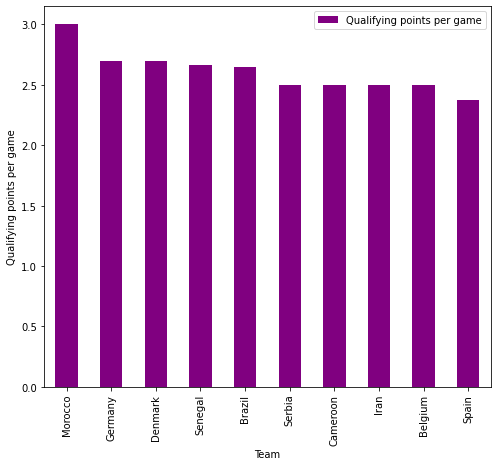

In [ ]:
import matplotlib.pyplot as plt

ppg_qualifying_2022=ppg_qualifying_2022[:10]
ppg_qualifying_2022.plot("Team","Qualifying points per game",kind="bar",xlabel="Team",ylabel="Qualifying points per game",figsize=(8,7),color="purple")
plt.xticks(rotation=90)
#[:10].plot(x="Team", y="Ranking",kind="bar",color="Orange")

In [ ]:
condition = [(wc_2022_group_stage.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_group_stage['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2022_group_stage.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_group_stage['away_team_qualifying_ppg'] = np.select(condition, values)

wc_2022_group_stage.head()

AttributeError: ignored

In [ ]:
totalRes.drop(['date','tournament','city','country','neutral'], axis=1, inplace=True)
totalRes.dropna(inplace=True)
totalRes_filter = pd.DataFrame(totalRes[['away_team','home_team','away_score','home_score']])
totalRes = totalRes.append(totalRes_filter)

In [ ]:
home = totalRes['home_score'].values
away = totalRes['away_score'].values
result = []
for i in range(totalRes.shape[0]):
    if home[i] == away[i]:
        result.append('Draw')
    elif home[i] > away[i]:
        result.append('Win')
    else:
        result.append('Loss')
totalRes['result'] = result

In [ ]:
win_pct_dict_home={}
win_pct_dict_away={}

for i in wc_2022_group_stage["home_team"].values:
    totalRes_team = totalRes[totalRes.home_team == i]
    win = totalRes_team['result'].value_counts()['Win']
    win_pct = win/totalRes_team.shape[0]
    win_pct_dict_home[i]=win_pct*100
for i in wc_2022_group_stage["away_team"].values:
    totalRes_team = totalRes[totalRes.home_team == i]
    win = totalRes_team['result'].value_counts()['Win']
    win_pct = win/totalRes_team.shape[0]
    win_pct_dict_away[i]=win_pct*100

KeyError: ignored

In [ ]:
condition = [(wc_2022_group_stage.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2022_group_stage['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2022_group_stage.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2022_group_stage['away_team_historical_win_pct'] = np.select(condition, values)
wc_2022_group_stage.head()

ValueError: ignored

In [ ]:
wc_2022_group_stage=wc_2022_group_stage.drop(columns=["home_score","away_score","date"])
wc_2022_group_stage_reverse=pd.DataFrame()
wc_2022_group_stage_reverse = wc_2022_group_stage.rename(columns = {'home_team':'away_team', 'away_team':'home_team','home_score':'away_score','away_score':'home_score','home_team_rankings':'away_team_rankings','away_team_rankings':'home_team_rankings','home_team_qualifying_ppg':'away_team_qualifying_ppg','away_team_qualifying_ppg':'home_team_qualifying_ppg','home_team_historical_win_pct':'away_team_historical_win_pct','away_team_historical_win_pct':'home_team_historical_win_pct'})
for i in range(len(wc_2022_group_stage_reverse["Result"].values)):
    if wc_2022_group_stage_reverse["Result"].iloc[i] == "Win":
        wc_2022_group_stage_reverse["Result"].iloc[i]="Loss"
    elif wc_2022_group_stage_reverse["Result"].iloc[i] == "Loss":
        wc_2022_group_stage_reverse["Result"].iloc[i]="Win"

TypeError: ignored

In [ ]:
frames = [wc_2022_group_stage,wc_2022_group_stage_reverse, ]
wc_2022_group_stage=pd.concat(frames)
wc_2022_group_stage.reset_index(drop=True, inplace=True)
wc_2022_group_stage

ValueError: ignored

In [ ]:
X=wc_2022_group_stage.drop(columns=["Result","home_team","away_team"])
y=wc_2022_group_stage["Result"]

KeyError: ignored

In [ ]:
y_pred_log = log_model.predict(X)

y_pred_dt= dt_model.predict(X)

y_pred_rf= rf_model.predict(X)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: ignored

In [ ]:
wc_2022_group_stage[0:48]

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Qatar,Ecuador,Loss,50,44,2.154439,1.444444,48.664688,43.600000
1,Senegal,Netherlands,Loss,18,8,2.666667,2.300000,60.000000,57.596372
2,England,Iran,Win,5,20,0.100000,2.500000,62.213740,63.265306
3,United States,Wales,Draw,16,19,1.785714,1.875000,54.708520,38.416422
4,Argentina,Saudi Arabia,Loss,3,51,2.294118,2.300000,66.021127,56.345178
5,Mexico,Poland,Draw,13,26,2.000000,2.000000,58.738739,51.604938
6,Denmark,Tunisia,Draw,10,30,2.700000,2.166667,54.373522,56.172840
7,France,Australia,Win,4,38,2.250000,1.500000,58.134921,57.049180
8,Germany,Japan,Loss,11,24,2.700000,2.200000,62.167300,52.078240
9,Spain,Costa Rica,Win,7,31,2.375000,1.785714,67.810026,60.060976


In [ ]:
score = log_model.score(X[0:48], y[0:48])
score

0.5625

In [ ]:
from collections import defaultdict
total_points_pred = {key: 0 for key in wc_2022_group_stage["home_team"].values}
for match,i in zip(wc_2022_group_stage.values[0:48],y_pred_log[0:48]):
    if i == "Win":
        print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
        total_points_pred[match[0]]+=3
    elif i == "Loss":
        print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
        total_points_pred[match[1]]+=3
    else:
        print(" Predicted winner between {} and {} is {}".format(match[0],match[1],"Draw"))
        total_points_pred[match[0]]+=1
        total_points_pred[match[1]]+=1

 Predicted winner between Qatar and Ecuador is Ecuador
 Predicted winner between Senegal and Netherlands is Draw
 Predicted winner between England and Iran is England
 Predicted winner between United States and Wales is United States
 Predicted winner between Argentina and Saudi Arabia is Argentina
 Predicted winner between Mexico and Poland is Mexico
 Predicted winner between Denmark and Tunisia is Denmark
 Predicted winner between France and Australia is France
 Predicted winner between Germany and Japan is Germany
 Predicted winner between Spain and Costa Rica is Spain
 Predicted winner between Morocco and Croatia is Draw
 Predicted winner between Belgium and Canada is Belgium
 Predicted winner between Switzerland and Cameroon is Switzerland
 Predicted winner between Brazil and Serbia is Brazil
 Predicted winner between Uruguay and South Korea is Uruguay
 Predicted winner between Portugal and Ghana is Portugal
 Predicted winner between Qatar and Senegal is Senegal
 Predicted winner 

In [ ]:
GroupA2022 = {"Qatar":0,"Netherlands":0,"Ecuador":0,"Senegal":0}
GroupB2022 = {"England":0,"United States":0,"Wales":0,"Iran":0}
GroupC2022 = {"Argentina":0,"Poland":0,"Mexico":0,"Saudi Arabia":0}
GroupD2022 = {"France":0,"Australia":0,"Tunisia":0,"Denmark":0}
GroupE2022 = {"Costa Rica":0,"Japan":0,"Spain":0,"Germany":0}
GroupF2022 = {"Morocco":0,"Croatia":0,"Belgium":0,"Canada":0}
GroupG2022 = {"Brazil":0,"Switzerland":0,"Cameroon":0,"Serbia":0}
GroupH2022 = {"Portugal":0,"South Korea":0,"Uruguay":0,"Ghana":0}

for k,v in total_points_pred.items():
    if k in GroupA2022.keys():
        GroupA2022[k]=v
    elif k in GroupB2022.keys():
        GroupB2022[k]=v
    elif k in GroupC2022.keys():
        GroupC2022[k]=v
    elif k in GroupD2022.keys():
        GroupD2022[k]=v
    elif k in GroupE2022.keys():
        GroupE2022[k]=v
    elif k in GroupF2022.keys():
        GroupF2022[k]=v
    elif k in GroupG2022.keys():
        GroupG2022[k]=v
    elif k in GroupH2022.keys():
        GroupH2022[k]=v

In [ ]:
GroupA2022=pd.DataFrame(sorted(GroupA2022.items(), key=lambda x: x[1], reverse=True), columns=['Team', 'Points'],)
GroupB2022=pd.DataFrame(sorted(GroupB2022.items(), key=lambda x: x[1], reverse=True), columns=['Team', 'Points'])
GroupC2022=pd.DataFrame(sorted(GroupC2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupD2022=pd.DataFrame(sorted(GroupD2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupE2022=pd.DataFrame(sorted(GroupE2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupF2022=pd.DataFrame(sorted(GroupF2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupG2022=pd.DataFrame(sorted(GroupG2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])
GroupH2022=pd.DataFrame(sorted(GroupH2022.items(), key=lambda x: x[1],reverse=True), columns=['Team', 'Points'])

In [ ]:
GroupStage2022={"Group A":GroupA2022,"Group B":GroupB2022,"Group C":GroupC2022,"Group D":GroupD2022,"Group E":GroupE2022,"Group F":GroupF2022,"Group G":GroupG2022,"Group H":GroupH2022}
print("2022 WC group stage standings")
for k,v in GroupStage2022.items():
  print("----------------------")
  print("\t {}".format(k))
  ICD.display(v)




2022 WC group stage standings
----------------------
	 Group A


,Team,Points
0,Netherlands,7
1,Senegal,7
2,Ecuador,3
3,Qatar,0


----------------------
	 Group B


,Team,Points
0,England,9
1,Iran,6
2,United States,3
3,Wales,0


----------------------
	 Group C


,Team,Points
0,Argentina,9
1,Mexico,6
2,Poland,3
3,Saudi Arabia,0


----------------------
	 Group D


,Team,Points
0,France,7
1,Denmark,7
2,Tunisia,3
3,Australia,0


----------------------
	 Group E


,Team,Points
0,Spain,7
1,Germany,7
2,Costa Rica,3
3,Japan,0


----------------------
	 Group F


,Team,Points
0,Morocco,5
1,Croatia,5
2,Belgium,5
3,Canada,0


----------------------
	 Group G


,Team,Points
0,Brazil,9
1,Serbia,6
2,Switzerland,3
3,Cameroon,0


----------------------
	 Group H


,Team,Points
0,Portugal,9
1,Uruguay,6
2,South Korea,3
3,Ghana,0


In [ ]:
#Round of 16
wc_2022_ro16=wc_2022_group_stage
wc_2022_ro16=wc_2022_ro16.iloc[0:0]

In [ ]:
wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupA2022["Team"][0],'away_team':GroupB2022["Team"][1]}, ignore_index=True)
wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupA2022["Team"][1],'away_team':GroupB2022["Team"][0]}, ignore_index=True)

wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupC2022["Team"][0],'away_team':GroupD2022["Team"][1]}, ignore_index=True)
wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupC2022["Team"][1],'away_team':GroupD2022["Team"][0]}, ignore_index=True)

wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupE2022["Team"][0],'away_team':GroupF2022["Team"][1]}, ignore_index=True)
wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupE2022["Team"][1],'away_team':GroupF2022["Team"][0]}, ignore_index=True)

wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupG2022["Team"][0],'away_team':GroupH2022["Team"][1]}, ignore_index=True)
wc_2022_ro16=wc_2022_ro16.append({'home_team':GroupG2022["Team"][1],'away_team':GroupH2022["Team"][0]}, ignore_index=True)


,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Netherlands,Iran,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Senegal,England,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,Denmark,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mexico,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Spain,Croatia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Germany,Morocco,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Brazil,Uruguay,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Serbia,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
condition = [(wc_2022_ro16.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_ro16['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2022_ro16.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_ro16['away_team_qualifying_ppg'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_ro16.home_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_ro16['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2022_ro16.away_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_ro16['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_ro16.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2022_ro16['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2022_ro16.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2022_ro16['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
wc_2022_ro16

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Netherlands,Iran,NaN,0,20,2.300000,2.500000,57.596372,63.265306
1,Senegal,England,NaN,18,5,2.666667,0.100000,60.000000,62.213740
2,Argentina,Denmark,NaN,3,10,2.294118,2.700000,66.021127,54.373522
3,Mexico,France,NaN,13,4,2.000000,2.250000,58.738739,58.134921
4,Spain,Croatia,NaN,7,12,2.375000,2.300000,67.810026,60.465116
5,Germany,Morocco,NaN,11,22,2.700000,3.000000,62.167300,61.858974
6,Brazil,Uruguay,NaN,1,14,2.647059,1.555556,71.717172,55.431755
7,Serbia,Portugal,NaN,21,9,2.500000,2.125000,54.166667,58.260870


In [ ]:
X = wc_2022_ro16.drop(columns=["Result","home_team","away_team"])

y_pred = log_model.predict(X)

In [ ]:
wc_2022_ro16.values

array([['Netherlands', 'Iran', nan, 0, 20, 2.3, 2.5, 57.596371882086174,
        63.26530612244898],
       ['Senegal', 'England', nan, 18, 5, 2.666666667, 0.1, 60.0,
        62.213740458015266],
       ['Argentina', 'Denmark', nan, 3, 10, 2.294117647, 2.7,
        66.02112676056338, 54.37352245862884],
       ['Mexico', 'France', nan, 13, 4, 2.0, 2.25, 58.73873873873874,
        58.13492063492064],
       ['Spain', 'Croatia', nan, 7, 12, 2.375, 2.3, 67.81002638522428,
        60.46511627906976],
       ['Germany', 'Morocco', nan, 11, 22, 2.7, 3.0, 62.16730038022814,
        61.858974358974365],
       ['Brazil', 'Uruguay', nan, 1, 14, 2.647058824, 1.555555556,
        71.71717171717171, 55.43175487465181],
       ['Serbia', 'Portugal', nan, 21, 9, 2.5, 2.125, 54.166666666666664,
        58.26086956521739]], dtype=object)

In [ ]:
y_pred

array(['Win', 'Loss', 'Draw', 'Loss', 'Win', 'Draw', 'Win', 'Loss'],
      dtype=object)

In [ ]:
import random
quarter_final=[]
for match,i in zip(wc_2022_ro16.values,y_pred):
    if i == "Win":
        print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
        quarter_final.append(match[0])
    elif i == "Loss":
        print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
        quarter_final.append(match[1])
    else:
        penalty=random.choice([match[0],match[1]])
        print(" Predicted winner between {} and {} is {} with penalty shootout".format(match[0],match[1],penalty))
        quarter_final.append(penalty)

 Predicted winner between Netherlands and Iran is Netherlands
 Predicted winner between Senegal and England is England
 Predicted winner between Argentina and Denmark is Argentina with penalty shootout
 Predicted winner between Mexico and France is France
 Predicted winner between Spain and Croatia is Spain
 Predicted winner between Germany and Morocco is Morocco with penalty shootout
 Predicted winner between Brazil and Uruguay is Brazil
 Predicted winner between Serbia and Portugal is Portugal


In [ ]:
wc_2022_qtr=wc_2022_ro16
wc_2022_qtr=wc_2022_qtr.iloc[0:0]

wc_2022_qtr=wc_2022_qtr.append({'home_team':quarter_final[0],'away_team':quarter_final[2]}, ignore_index=True)
wc_2022_qtr=wc_2022_qtr.append({'home_team':quarter_final[4],'away_team':quarter_final[6]}, ignore_index=True)

wc_2022_qtr=wc_2022_qtr.append({'home_team':quarter_final[1],'away_team':quarter_final[3]}, ignore_index=True)
wc_2022_qtr=wc_2022_qtr.append({'home_team':quarter_final[5],'away_team':quarter_final[7]}, ignore_index=True)

In [ ]:
wc_2022_qtr

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Netherlands,Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spain,Brazil,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,England,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Morocco,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
condition = [(wc_2022_qtr.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_qtr['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2022_qtr.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_qtr['away_team_qualifying_ppg'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_qtr.home_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_qtr['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2022_qtr.away_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_qtr['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_qtr.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2022_qtr['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2022_qtr.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2022_qtr['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
X = wc_2022_qtr.drop(columns=["Result","home_team","away_team"])

y_pred = log_model.predict(X)

In [ ]:
y_pred

array(['Draw', 'Draw', 'Win', 'Loss'], dtype=object)

In [ ]:
semi_final=[]
for match,i in zip(wc_2022_qtr.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    semi_final.append(match[0])
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    semi_final.append(match[1])
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} with shootout".format(match[0],match[1],penalty))
    semi_final.append(penalty)

 Predicted winner between Netherlands and Argentina is Argentina with shootout
 Predicted winner between Spain and Brazil is Brazil with shootout
 Predicted winner between England and France is England
 Predicted winner between Morocco and Portugal is Portugal


In [ ]:
wc_2022_semi=wc_2022_qtr
wc_2022_semi=wc_2022_semi.iloc[0:0]

wc_2022_semi=wc_2022_semi.append({'home_team':semi_final[0],'away_team':semi_final[1]}, ignore_index=True)
wc_2022_semi=wc_2022_semi.append({'home_team':semi_final[2],'away_team':semi_final[3]}, ignore_index=True)

In [ ]:
condition = [(wc_2022_semi.home_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_semi['home_team_qualifying_ppg'] = np.select(condition, values)

condition = [(wc_2022_semi.away_team == x) for x in ppg_qualifying_dict.keys()]
values = ppg_qualifying_dict.values()
wc_2022_semi['away_team_qualifying_ppg'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_semi.home_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_semi['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2022_semi.away_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_semi['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_semi.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2022_semi['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2022_semi.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2022_semi['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
X = wc_2022_semi.drop(columns=["Result","home_team","away_team"])

y_pred = log_model.predict(X)

In [ ]:
final=[]
for match,i in zip(wc_2022_semi.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
    final.append(match[0])
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
    final.append(match[1])
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} with shootout".format(match[0],match[1],penalty))
    final.append(penalty)

 Predicted winner between Argentina and Brazil is Argentina with shootout
 Predicted winner between England and Portugal is England


In [ ]:
wc_2022_final=wc_2022_semi
wc_2022_final=wc_2022_final.iloc[0:0]

wc_2022_final=wc_2022_final.append({'home_team':final[0],'away_team':final[1]}, ignore_index=True)

In [ ]:
condition = [(wc_2022_final.home_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_final['home_team_rankings'] = np.select(condition, values)

condition = [(wc_2022_final.away_team == x) for x in ranking2022_dict.keys()]
values = ranking2022_dict.values()
wc_2022_final['away_team_rankings'] = np.select(condition, values)

In [ ]:
condition = [(wc_2022_final.home_team == x) for x in win_pct_dict_home.keys()]
values = win_pct_dict_home.values()
wc_2022_final['home_team_historical_win_pct'] = np.select(condition, values)

condition = [(wc_2022_final.away_team == x) for x in win_pct_dict_away.keys()]
values = win_pct_dict_away.values()
wc_2022_final['away_team_historical_win_pct'] = np.select(condition, values)

In [ ]:
wc_2022_final

,home_team,away_team,Result,home_team_rankings,away_team_rankings,home_team_qualifying_ppg,away_team_qualifying_ppg,home_team_historical_win_pct,away_team_historical_win_pct
0,Argentina,England,NaN,3,5,NaN,NaN,66.021127,62.21374


In [ ]:
for match,i in zip(wc_2022_final.values,y_pred):
  if i == "Win":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[0]))
  elif i == "Loss":
    print(" Predicted winner between {} and {} is {}".format(match[0],match[1],match[1]))
  else:
    penalty=random.choice([match[0],match[1]])
    print(" Predicted winner between {} and {} is {} with shootout".format(match[0],match[1],penalty))

 Predicted winner between Argentina and England is Argentina with shootout
